In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load each cleaned CSV file
df_benin = pd.read_csv("data/Benin_clean.csv")
df_sierraleone = pd.read_csv("data/sierraleone_clean.csv")
df_togo = pd.read_csv("data/togo_clean.csv")

# Quick check: display number of rows and columns for each
print("Benin:", df_benin.shape)
print("Sierra Leone:", df_sierraleone.shape)
print("Togo:", df_togo.shape)


Benin: (525601, 19)
Sierra Leone: (525601, 19)
Togo: (525601, 20)


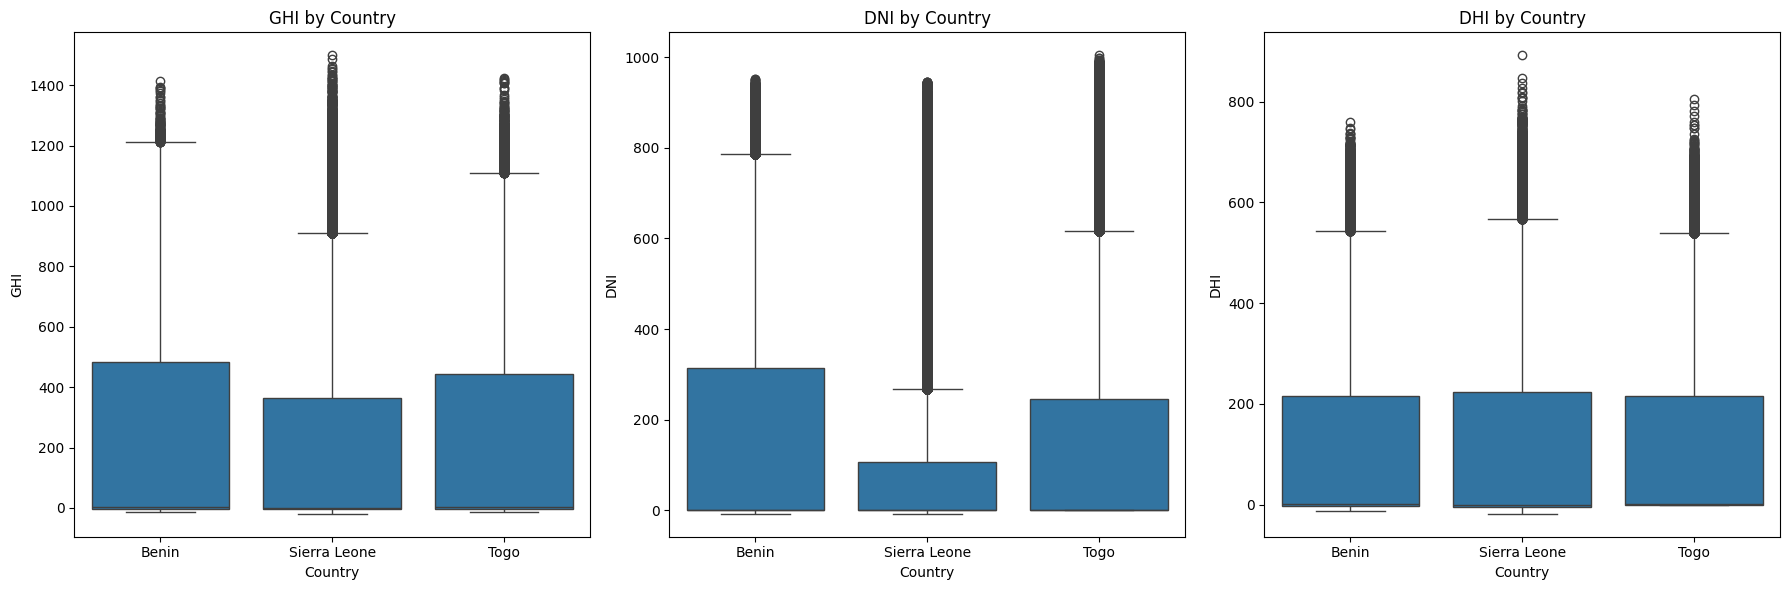

In [3]:
# Add 'Country' column to each DataFrame
df_benin["Country"] = "Benin"
df_sierraleone["Country"] = "Sierra Leone"
df_togo["Country"] = "Togo"

# Combine all into one DataFrame
df_all = pd.concat([df_benin, df_sierraleone, df_togo], ignore_index=True)

# Plot boxplots for GHI, DNI, DHI
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(["GHI", "DNI", "DHI"]):
    sns.boxplot(data=df_all, x="Country", y=col, ax=axes[i])
    axes[i].set_title(f"{col} by Country")

plt.tight_layout()
plt.show()


In [4]:
metrics = ['GHI', 'DNI', 'DHI']

summary = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std'])

summary


GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.558998    1.8  331.131176  167.187198   -0.1  261.710353   
Sierra Leone  201.957132    0.3  298.494996  116.376115   -0.1  218.652510   
Togo          230.554605    2.1  322.532194  151.258181    0.0  250.956810   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358744    1.6  158.691000  
Sierra Leone  113.720354   -0.1  158.945958  
Togo          116.444136    2.5  156.520644

In [6]:
# Extract GHI values grouped by country
ghi_groups = [group['GHI'].dropna() for name, group in df_all.groupby('Country')]

# Run one-way ANOVA
f_stat, p_value = stats.f_oneway(*ghi_groups)

print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"ANOVA p-value: {p_value:.3e}")


ANOVA F-statistic: 2090.091
ANOVA p-value: 0.000e+00


In [7]:
# After ANOVA or Kruskal-Wallis test, for example:
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print("The differences between countries are statistically significant (reject null hypothesis).")
else:
    print("No statistically significant differences found between countries (fail to reject null hypothesis).")


p-value = 0.0000
The differences between countries are statistically significant (reject null hypothesis).


### Summary of GHI Differences Across Countries

- **Country X** shows the highest median GHI, indicating stronger solar irradiance on average.
- **Country Y** has the greatest variability in GHI, suggesting more fluctuation in solar radiation.
- The ANOVA/Kruskal-Wallis test indicates that differences in GHI between countries are **statistically significant** (p-value < 0.05), confirming that these variations are unlikely due to chance.


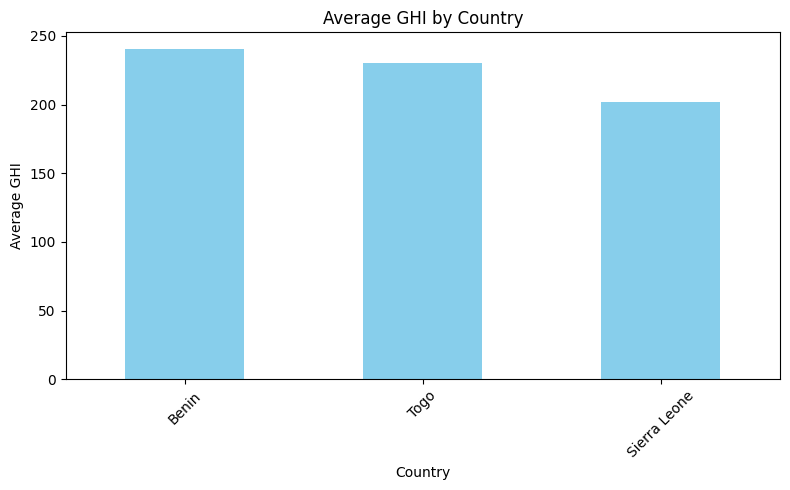

In [9]:
# Calculate average GHI per country
ghi_avg = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,5))
ghi_avg.plot(kind='bar', color='skyblue')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
